# Iris Dataset

In [6]:
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [12]:
# import some data to play with
iris = datasets.load_iris()

iris_data = pd.DataFrame(iris['data'],columns=iris['feature_names'])
iris_data['target'] = iris['target']
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [32]:
iris_data.iloc[:,0:4].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
iris_data['target'] = iris.target_names[iris_data.target]
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
iris_data.groupby('target').size()

target
setosa        50
versicolor    50
virginica     50
dtype: int64

## Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12118d198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1208aeba8>]], dtype=object)

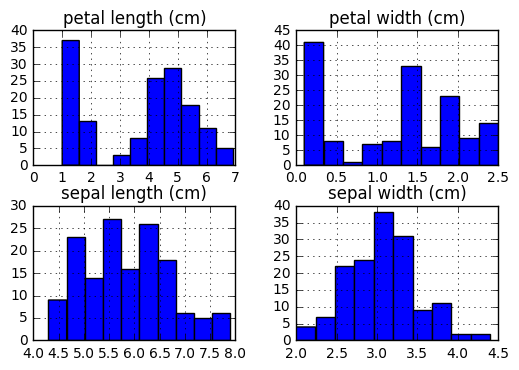

In [36]:
iris_data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12227f208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122b29cc0>]], dtype=object)

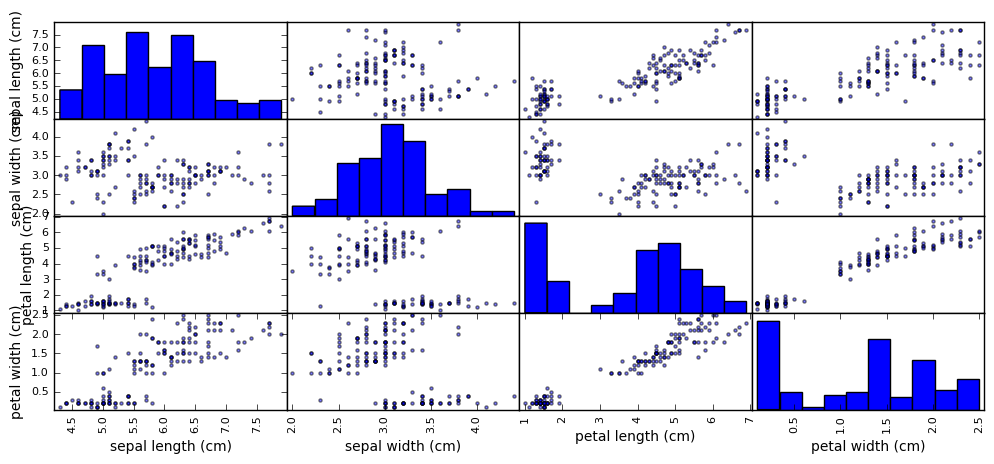

In [38]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(iris_data,figsize=(12,5))

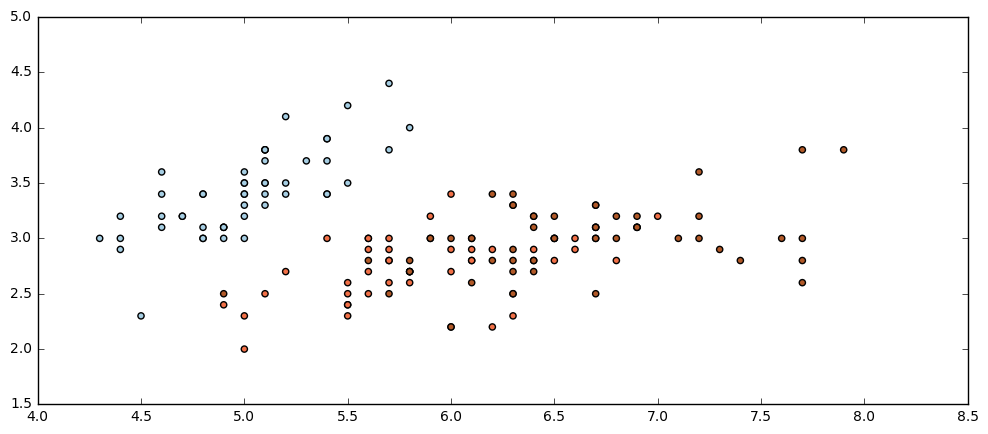

In [19]:
plt.figure(figsize=(12,5))
plt.scatter(iris_data['sepal length (cm)'],iris_data['sepal width (cm)'],c=iris_data['target'],cmap=plt.cm.Paired)
plt.show()

### Principal component Analysis

This is one method of visualising high dimensional data in a manageable amount of dimensions (eg. 2 or 3)
![pca](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/720px-GaussianScatterPCA.svg.png)

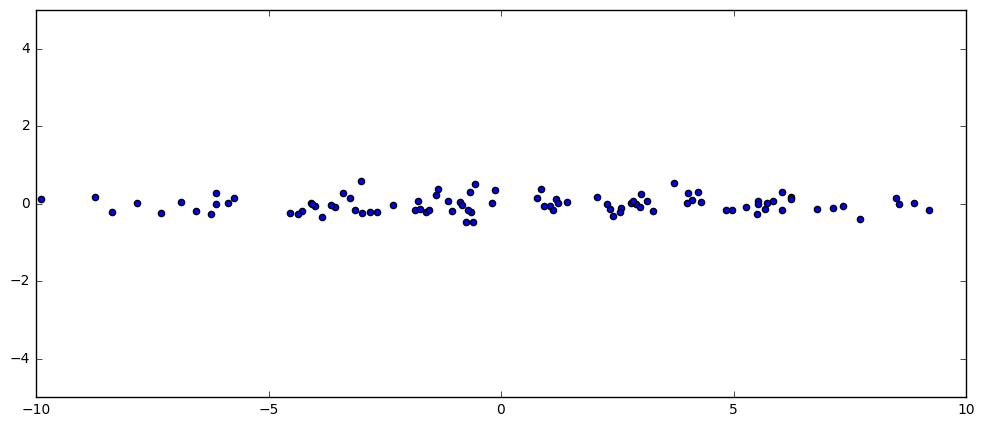

In [28]:
import numpy as np

a = 5*np.random.randn(100,1)
b = 0.2*np.random.randn(100,1)
data = np.hstack([a,b])

plt.figure(figsize=(12,5))
plt.axis([-10,10,-5,5])
plt.scatter(data[:,0],data[:,1])
plt.show()

In [29]:
X_reduced = PCA(n_components=3).fit_transform(iris.data)

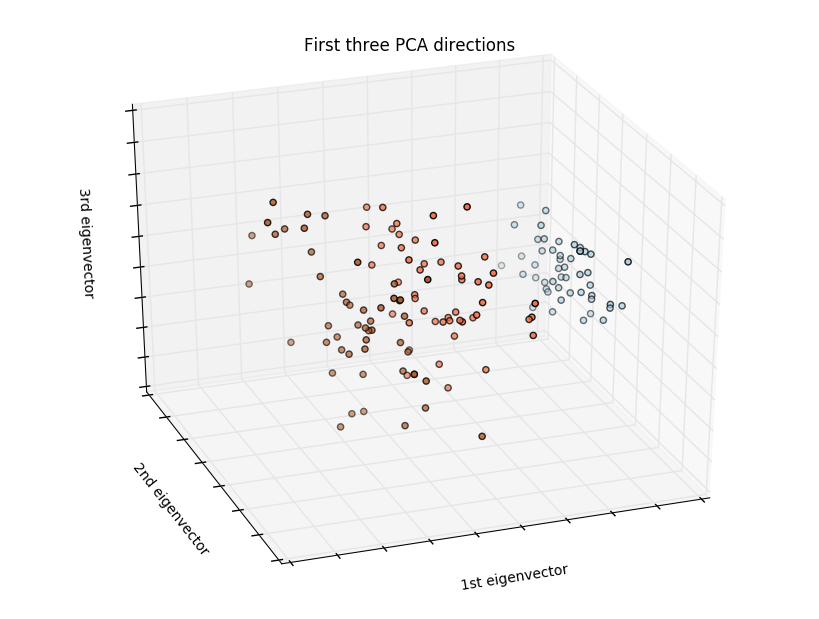

In [31]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=iris.target,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## Machine Learning Component

In [40]:
from sklearn.cross_validation import train_test_split

array = iris_data.values
X = array[:,0:4]
Y = array[:,4]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class="multinomial", solver="newton-cg", n_jobs=-1)
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
model.predict_proba(X_validation)

array([[  3.77030228e-03,   8.26967796e-01,   1.69261901e-01],
       [  9.47162209e-01,   5.28375927e-02,   1.98577513e-07],
       [  8.51084343e-09,   1.55716435e-03,   9.98442827e-01],
       [  6.37896048e-03,   7.92134969e-01,   2.01486071e-01],
       [  1.43121672e-03,   7.74067213e-01,   2.24501571e-01],
       [  9.56307861e-01,   4.36919637e-02,   1.75023554e-07],
       [  7.74385321e-02,   9.08244977e-01,   1.43164913e-02],
       [  1.57835651e-04,   1.56049968e-01,   8.43792196e-01],
       [  2.20687005e-03,   7.62321299e-01,   2.35471831e-01],
       [  2.83296116e-02,   9.45738101e-01,   2.59322873e-02],
       [  4.30910520e-04,   2.43701627e-01,   7.55867462e-01],
       [  9.68983172e-01,   3.10167511e-02,   7.67036219e-08],
       [  9.73336958e-01,   2.66630089e-02,   3.29176511e-08],
       [  9.62842399e-01,   3.71574918e-02,   1.09141090e-07],
       [  9.79453097e-01,   2.05468383e-02,   6.42202230e-08],
       [  4.47349667e-03,   7.12918405e-01,   2.8260809

In [45]:
model.predict(X_validation)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [47]:
Y_validation

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_validation,model.predict(X_validation))

1.0